<a href="https://www.kaggle.com/code/jorgeluiscruzquispe/descarga-pisco?scriptVersionId=174042946" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Descarga de Data de Precipitación puntual
---

## Instalando librerias

In [16]:
# instalando librerias
install.packages("sp")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Importando librerias

In [17]:
# importando librerias
library(sp)
library(raster)
library(ncdf4)
library(ggplot2)
library(readr)

Coordenadas de las estaciones

In [ ]:
# vector nombre de estaciones
NN <- c("estación tamboraque", "pisco 2", "pisco 3", "pisco 4", "pisco 5", "pisco 6", "pisco 7", "pisco 8", "pisco 9")

# vector de eje de longitud
XX <- c(-78.2930, -78.2083, -78.1500, -77.9542, -77.7754, -77.6500, -77.4538, -77.3489, -77.2333)

# vector de eje de latitud
YY <- c(-8.1215, -9.4337, -8.1000, -8.1916, -9.5352, -8.5667, -9.7292, -10.1578, -9.8833)

# dataframe en base a los vectores
coor_estaciones <- data.frame(NN, XX, YY)

# visulizando el dataframe generado
coor_estaciones

## Determinando precipitación diaria
---

In [19]:
# cargando archivo ncdf4
raster_pp <- raster::brick("/kaggle/input/piscop-daily-v2-2-nc/PISCOp_daily_v2.2.nc")

# obteniendo data de archivos de entrada
sp::coordinates(coor_estaciones) <- ~XX+YY

# siendo
raster::projection(coor_estaciones) <- raster::projection(raster_pp)

# coordenadas de estaciones
puntos_coor_estaciones <- raster::extract(raster_pp[[1]], coor_estaciones, cellnumbers = T)[,1]

# resultado
data_coor_estaciones <- t(raster_pp[puntos_coor_estaciones])

# resultado
colnames(data_coor_estaciones) <- as.character(coor_estaciones$NN)

In [20]:
# Convertir la matriz en un DataFrame
df_data <- as.data.frame(data_coor_estaciones)

# Insertando rango de tiempo
fechas <- seq(as.Date("1981-01-01"), as.Date("2019-12-31"), by = "days")

# Asignar las fechas al DataFrame
data <- as.data.frame(data_coor_estaciones, fechas)

head(data, 5)

,pisco 1,pisco 2,pisco 3,pisco 4,pisco 5,pisco 6,pisco 7,pisco 8,pisco 9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1981-01-01,2.18157053,0.031386416,0.2474083,0.05564314,0.002073569,2.866894,0.02507762,0.2868293,9.563934
1981-01-02,0.87175113,0.649650216,0.7935449,0.73806363,0.541991770,1.191985,0.70687562,0.9420525,1.646188
1981-01-03,1.38201880,0.009111311,0.1694527,0.04888167,0.002092817,2.866725,2.18834138,0.5468718,10.153066
1981-01-04,1.04244590,0.033639539,0.1698372,0.05426903,0.004291936,2.859507,1.27885997,3.7714977,12.889514
1981-01-05,0.01692094,0.000000000,0.6128677,0.02347458,0.000000000,11.053202,0.14331727,1.3756809,7.107991


In [21]:
options(
  repr.plot.width = 20,  # Ancho del gráfico en pulgadas
  repr.plot.height = 5  # Alto del gráfico en pulgadas
)

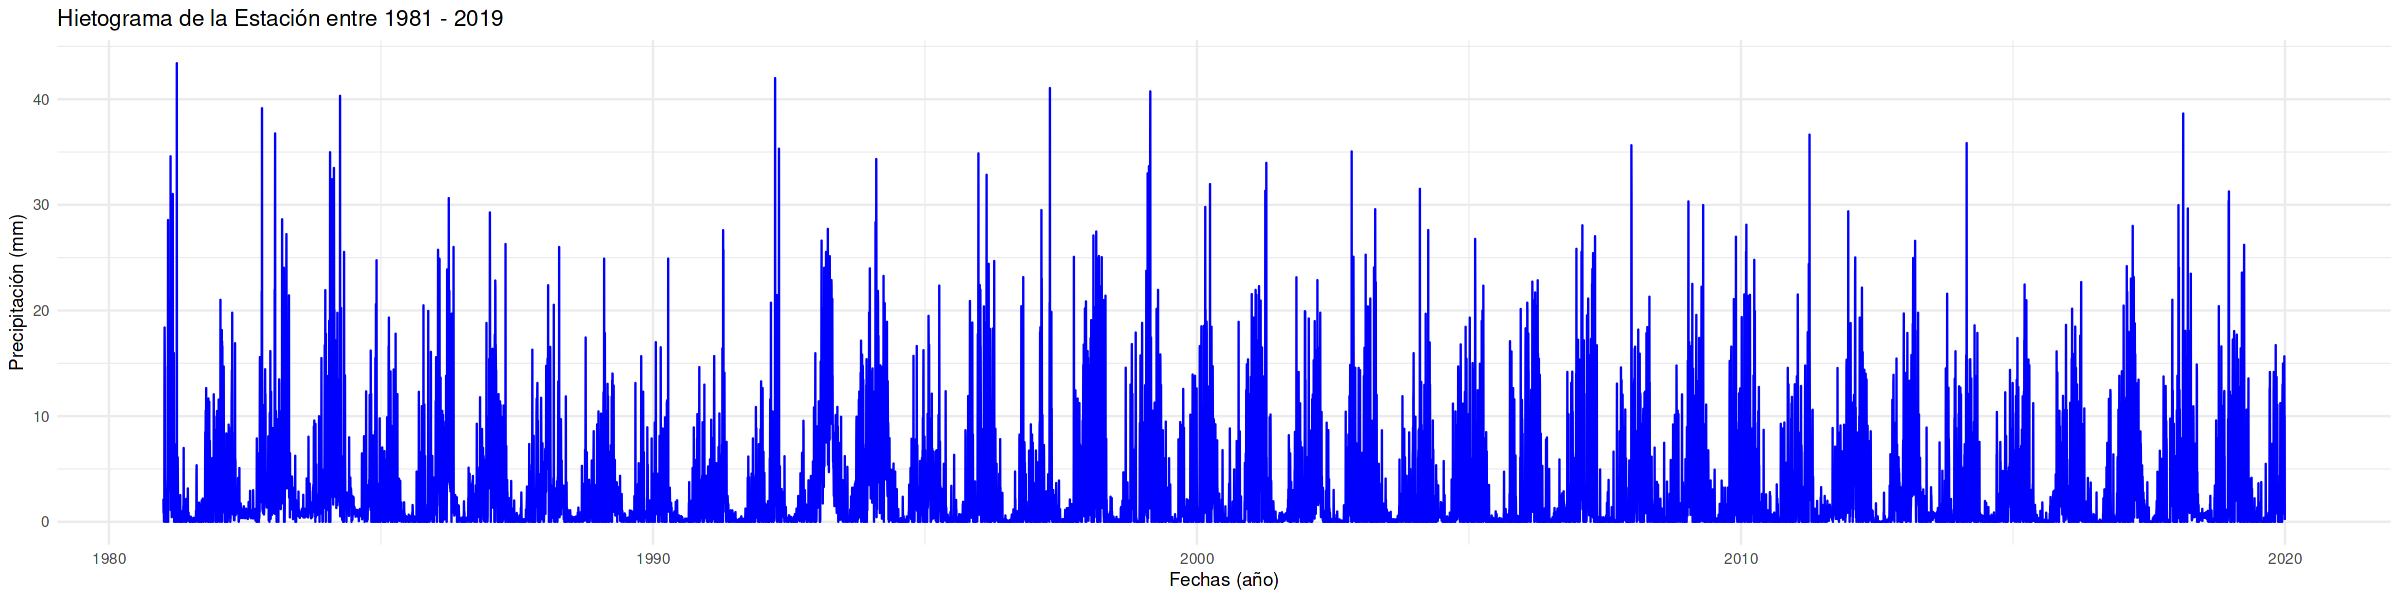

In [22]:
# Crear el gráfico de líneas
ggplot(data = data, aes(x = fechas, y = `pisco 1`), colour = "red") +
  geom_line(colour = "blue") +
  labs(x = "Fechas (año)", y = "Precipitación (mm)") +
  theme_minimal() +
  ggtitle("Hietograma de la Estación entre 1981 - 2019")

In [ ]:
# Guardar el DataFrame como un archivo CSV
write_csv(data, "data_diaria.csv")

## Determinando precipitación mensual 
---

In [ ]:
# vector nombre de estaciones
NN2 <- c("pisco 1", "pisco 2", "pisco 3", "pisco 4", "pisco 5", "pisco 6", "pisco 7", "pisco 8", "pisco 9")

# vector de eje de longitud
XX2 <- c(-78.2930, -78.2083, -78.1500, -77.9542, -77.7754, -77.6500, -77.4538, -77.3489, -77.2333)

# vector de eje de latitud
YY2 <- c(-8.1215, -9.4337, -8.1000, -8.1916, -9.5352, -8.5667, -9.7292, -10.1578, -9.8833)

# dataframe en base a los vectores
coor_estaciones2 <- data.frame(NN2, XX2, YY2)

# visulizando el dataframe generado
coor_estaciones2

In [ ]:
raster_pp_mensual <- raster::brick("/kaggle/input/piscop-monthly-v2-2-nc/PISCOp_monthly_v2.2.nc")

# obteniendo data de archivos de entrada
sp::coordinates(coor_estaciones2) <- ~XX2+YY2

# siendo
raster::projection(coor_estaciones2) <- raster::projection(raster_pp_mensual)

# coordenadas de estaciones
puntos_coor_estaciones2 <- raster::extract(raster_pp_mensual[[1]], coor_estaciones2, cellnumbers = T)[,1]

# resultado
data_mensual <- t(raster_pp_mensual[puntos_coor_estaciones2])

# resultado
colnames(data_mensual) <- as.character(coor_estaciones$NN)

# Insertando rango de tiempo
meses <- seq(as.Date("1981-01-01"), as.Date("2019-12-31"), by = "m")


# Convertir la matriz en un DataFrame
data_mes <- as.data.frame(data_mensual,meses)

tail(data_mes, 5)

In [ ]:
# Crear el gráfico de líneas
ggplot(data = data_mes, aes(x = meses, y = `pisco 1`)) +
geom_line(colour = "green") +
labs(x = "Fechas (año)", y = "Precipitación (mm)") +
theme_minimal() +
ggtitle("Hietograma de la Estación entre 1981 - 2019")

In [ ]:
# Guardar el DataFrame como un archivo CSV
write_csv(data_mes, "data_mensual.csv")